In [9]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

Contouring {#contouring_example}
==========

Generate iso-lines or -surfaces for the scalars of a surface or volume.

3D meshes can have 2D iso-surfaces of a scalar field extracted and 2D
surface meshes can have 1D iso-lines of a scalar field extracted.


In [10]:
import numpy as np

import pyvista as pv
from pyvista import examples

Iso-Lines
=========

Let\'s extract 1D iso-lines of a scalar field from a 2D surface mesh.


C:\Users\JangHo\.conda\envs\VisFlow\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


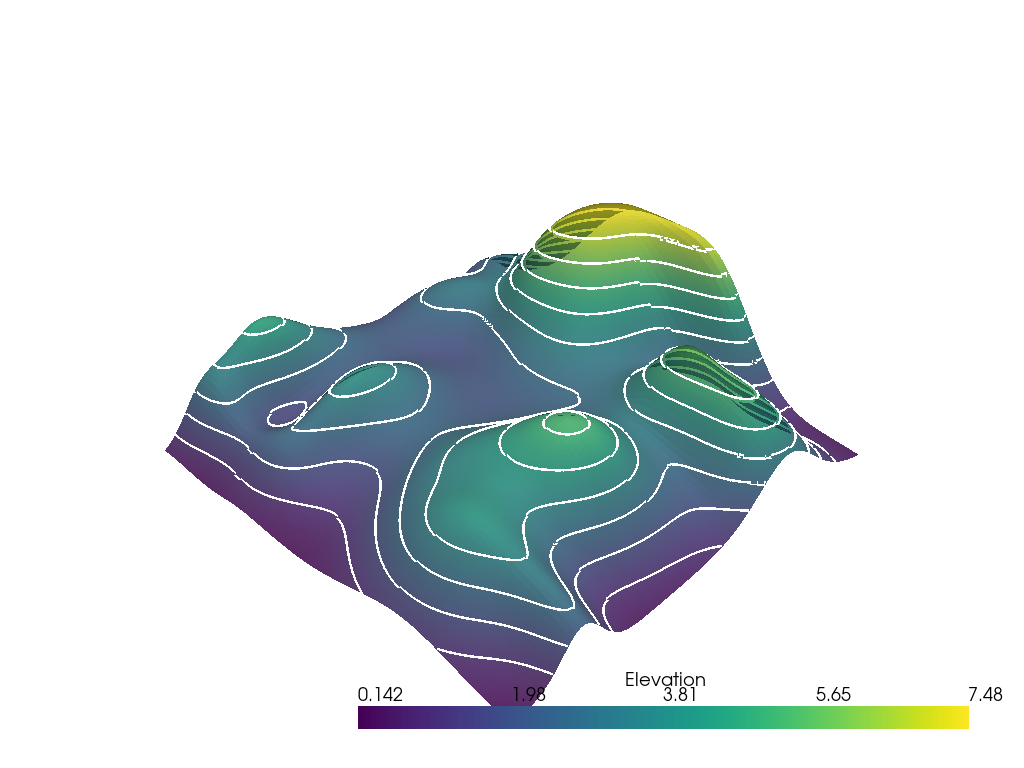

In [11]:
mesh = examples.load_random_hills()

contours = mesh.contour()

pl = pv.Plotter()
pl.add_mesh(mesh, opacity=0.85)
pl.add_mesh(contours, color="white", line_width=5)
pl.show()

Iso-Surfaces
============

Let\'s extract 2D iso-surfaces of a scalar field from a 3D mesh.


In [12]:
mesh = examples.download_embryo()

contours = mesh.contour(np.linspace(50, 200, 5))

pl = pv.Plotter()
pl.add_mesh(mesh.outline(), color="k")
pl.add_mesh(contours, opacity=0.25, clim=[0, 200])
pl.camera_position = [
    (-130.99381142132086, 644.4868354828589, 163.80447435848686),
    (125.21748748157661, 123.94368717158413, 108.83283586619626),
    (0.2780372840777734, 0.03547871361794171, 0.9599148553609699),
]
pl.show()

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /pyvista/vtk-data/master/Data/embryo.slc (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000249122801F0>: Failed to resolve 'raw.githubusercontent.com' ([Errno 11004] getaddrinfo failed)"))

Banded Contours
===============

Create banded contours for surface meshes using
`contour_banded() <pyvista.PolyDataFilters.contour_banded>`{.interpreted-text
role="func"}.


In [ ]:
mesh = examples.load_random_hills()

Set number of contours and produce mesh and lines


In [ ]:
n_contours = 8
contours, edges = mesh.contour_banded(n_contours)

Also make normal vectors


In [ ]:
arrows = mesh.glyph(scale="Normals", orient="Normals", tolerance=0.05)

In [ ]:
# Common display arguments
dargs = dict(scalars='Elevation', n_colors=n_contours - 1, cmap='Set3')

pl = pv.Plotter()
pl.add_mesh(edges, line_width=5, render_lines_as_tubes=True, color='k')
pl.add_mesh(contours, **dargs)
pl.add_mesh(arrows, **dargs)
pl.show()